### import lib

In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

In [2]:
img1 = plt.imread('lenna.png')

In [3]:
img2 = cv2.imread('lenna.png')

### Accessing pixel values

In [4]:
img1

array([[[0.8862745 , 0.5372549 , 0.49019608],
        [0.8862745 , 0.5372549 , 0.49019608],
        [0.8745098 , 0.5372549 , 0.52156866],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       [[0.8862745 , 0.5372549 , 0.49019608],
        [0.8862745 , 0.5372549 , 0.49019608],
        [0.8745098 , 0.5372549 , 0.52156866],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       [[0.8862745 , 0.5372549 , 0.49019608],
        [0.8862745 , 0.5372549 , 0.49019608],
        [0.8745098 , 0.5372549 , 0.52156866],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       ...,

       [[0.32941177, 0.07058824, 0.23529412],
        [0.32941177, 0.07058824, 0.23529412],
        [0.36078432, 0

In [5]:
img1.shape

(512, 512, 3)

In [6]:
x = img1[0,0]

In [7]:
x.shape

(3,)

In [8]:
x = x.reshape(1,1,3)

In [9]:
x

array([[[0.8862745 , 0.5372549 , 0.49019608]]], dtype=float32)

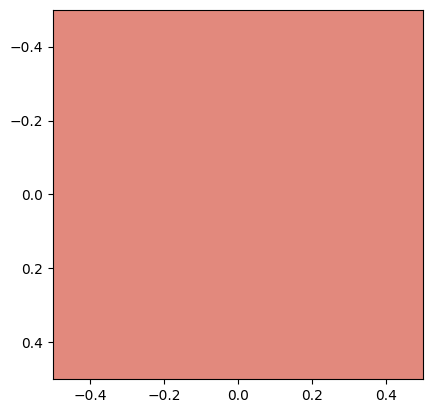

In [10]:
plt.imshow(x)

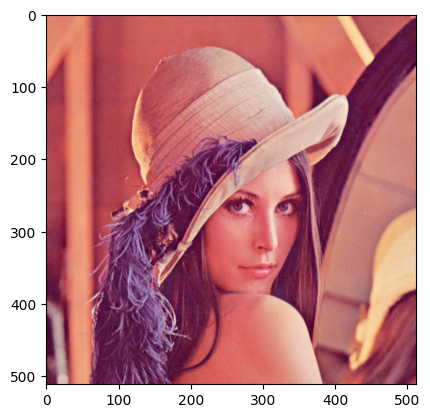

In [11]:
plt.imshow(img1)

In [12]:
import numpy as np

In [13]:
img1[200,100]

array([0.6862745 , 0.23137255, 0.27058825], dtype=float32)

In [14]:
img1[200,100] = np.array([0,0,0])

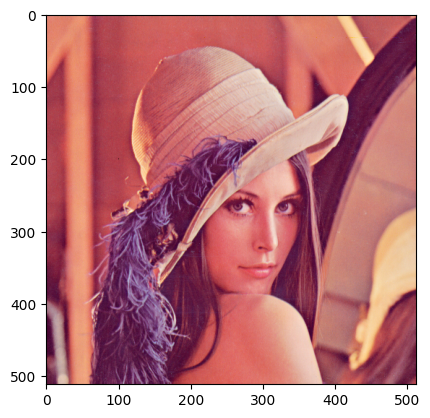

In [15]:
plt.imshow(img1)

In [16]:
img1[200,100]

array([0., 0., 0.], dtype=float32)

In [17]:
img1[0]

array([[0.8862745 , 0.5372549 , 0.49019608],
       [0.8862745 , 0.5372549 , 0.49019608],
       [0.8745098 , 0.5372549 , 0.52156866],
       ...,
       [0.9019608 , 0.5803922 , 0.47843137],
       [0.8666667 , 0.50980395, 0.43137255],
       [0.78431374, 0.3882353 , 0.3529412 ]], dtype=float32)

In [18]:
img1[250].shape

(512, 3)

In [19]:
img1[250] = np.array([0,0,0])

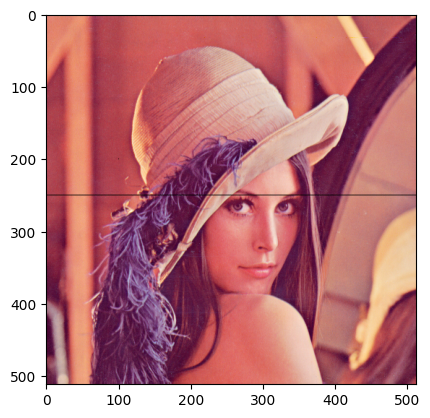

In [20]:
plt.imshow(img1)

### Iterating the pixels

In [21]:
x = np.array([[4,5,6],[8,7,3]])

In [22]:
x

array([[4, 5, 6],
       [8, 7, 3]])

In [23]:
for row in x:
    for col in  row:
        print(col+1.5)

5.5
6.5
7.5
9.5
8.5
4.5


In [24]:
img1.shape

(512, 512, 3)

In [25]:
for i in range(200,301):
    for j in range(200,301):
        img2[i,j] = np.array([255,0,255],dtype = np.uint8)

In [26]:
cv2.imshow('image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Getting pixels using pilo

In [27]:
img3 = Image.open('lenna.png')

In [28]:
pixel = img3.getpixel((0,0))  # Note the reversed order

In [29]:
pixel

(226, 137, 125)

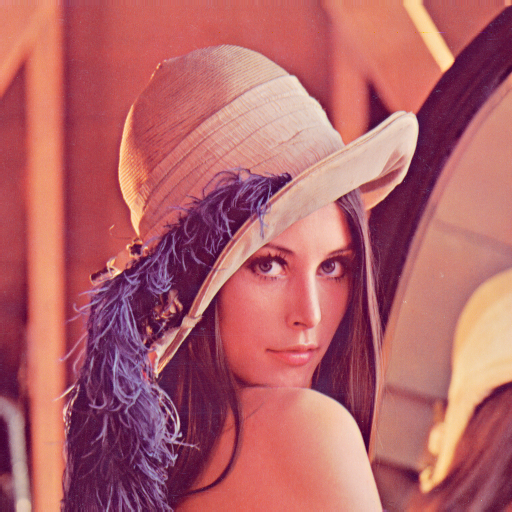

In [30]:
img3

In [31]:
img3.putpixel((250,250),(0,0,0))

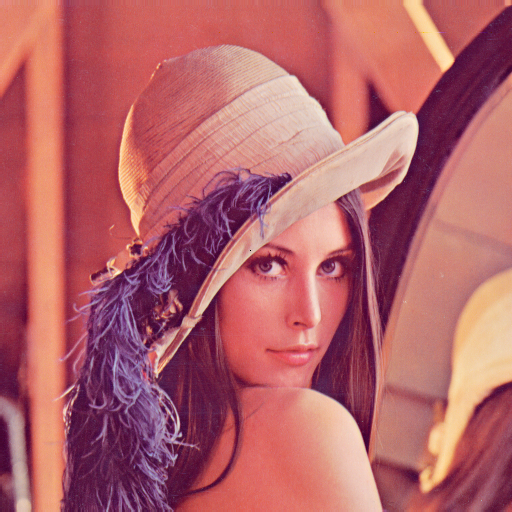

In [32]:
img3

In [33]:
for i in range(512):
    img3.putpixel((i,i),(0,0,0))

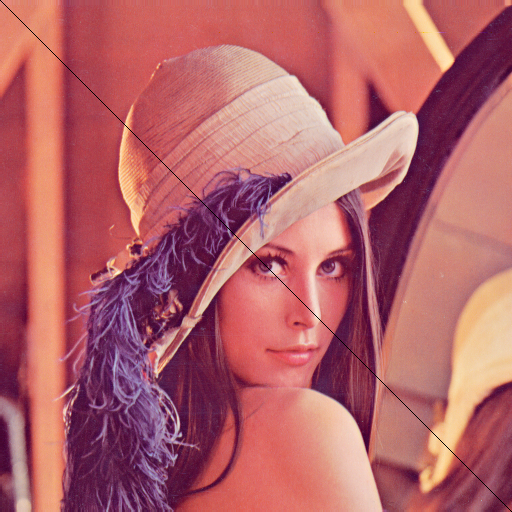

In [34]:
img3

In [35]:
col = 511
for i in range(512):
    img3.putpixel((i,col),(0,0,0))
    col-=1
        

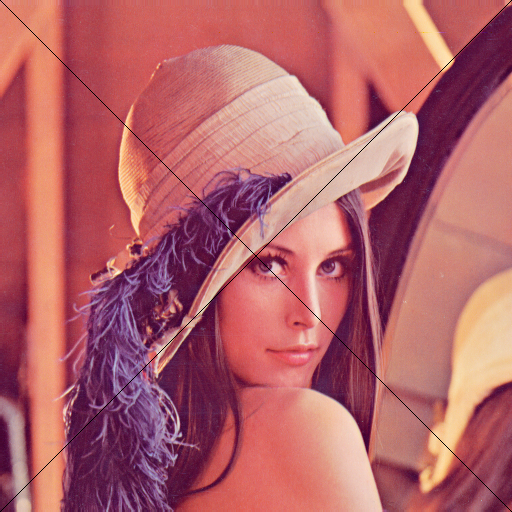

In [36]:
img3

### video processing

In [37]:
# load file
vid = cv2.VideoCapture('robots.mp4')

In [38]:
vid

< cv2.VideoCapture 0000023D71841A90>

In [39]:
ret,frame = vid.read()

In [40]:
ret

True

In [41]:
frame.shape

(640, 640, 3)

In [42]:
cv2.imshow('first frame',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(vid.get(cv2.CAP_PROP_FPS))

In [44]:
height,width,frames,fps

(640, 640, 1799, 30)

In [47]:
vid = cv2.VideoCapture('robots.mp4')
while True:
    ret,frame=vid.read()
    if not ret:
        break
    # Process the frame
    cv2.imshow('Video',frame)
    if cv2.waitKey(5) == ord('q'):
        break
cv2.destroyAllWindows()

In [48]:
# it will capture all images in video and saved in image folder
'''
vid = cv2.VideoCapture('robots.mp4')

success,frame = vid.read()

count = 1

while success:
    cv2.imwrite(f'images\{count}.jpg',frame)
    success,frame = vid.read()
    count+=1
'''

###  Working with timestamps on frame

In [49]:
# get frame at a specific timestamp
timestamp = '00:00:43.00'
hours,minutes,seconds = [float(i) for i in timestamp.split(':')]
print(hours,minutes,seconds)

0.0 0.0 43.0


In [51]:
timestamp = '00:00:43.00'
timestamp.split(':')

['00', '00', '43.00']

In [50]:
# get number of frames up to timestamp
trigger_frame = hours * 3600 * fps + minutes * 60 * fps + seconds * fps
print(frames , trigger_frame)

1799 1290.0


In [52]:
vid.set(1,trigger_frame)
success,frame = vid.read()

if success:
    cv2.imwrite('screen.jpg',frame)

In [53]:
cv2.imshow('Frame',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

### capture videos with cameras

In [54]:
cap = cv2.VideoCapture(0)

In [55]:
if cap.isOpened() == True:
    print('Camera is present')
else:
    print('camera is not avaliable')

camera is not avaliable


In [56]:
# Read until video is completed
while(cap.isOpened()):
    # Capture frame-by-frame
    ret,frame = cap.read()
    if ret ==True:
        cv2.imshow('Frame',frame)
    # Press Q on keyboard to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# When everything done, release the video capture object        
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

### capture and save video

In [59]:
video = cv2.VideoCapture(0)

In [60]:
# We 
frame_width = int(video.get(3))
frame_height = int(video.get(4))

size = (frame_width, frame_height)

In [61]:
size

(0, 0)

In [64]:
# Below VideoWriter object will create a frame of above defined the output
# is stored in 'filename.avi' file.
result = cv2.VideoWriter('myvid.avi', cv2.VideoWriter_fourcc(*'MJPG'), 30, size)

In [66]:
while(True):
    ret, frame = video.read()
    if ret == True:
        # Write the frame into the file 'filename.avi'
        result.write(frame)
        
        # Display the frame saved in the file
        cv2,imshow('Frame', frame)
        
        # Press S on keyboard to stop the process
        if cv2.waitKey(1) & 0xFF == ord('s'):
            break
    # Break the loop        
    else:
        break

cv2.destroyAllWindows()
video.release()